In [485]:
# Standard Library Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import json

# Sklearn libs
from sklearn.model_selection import train_test_split, cross_val_score, ShuffleSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA

from xgboost import XGBRegressor



In [486]:
"""EXPLORATORY DATA ANALYSIS"""

'EXPLORATORY DATA ANALYSIS'

In [487]:
df = pd.read_csv('/home/akeemlag/Downloads/processes2.csv')
df.head()

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,2,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,4,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,7,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,8,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399


In [488]:
print(df.shape)
print(df.info())

(2095, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2095 entries, 0 to 2094
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2095 non-null   int64  
 1   name                2095 non-null   object 
 2   year                2095 non-null   int64  
 3   selling_price       2095 non-null   int64  
 4   km_driven           2095 non-null   int64  
 5   fuel                2095 non-null   object 
 6   seller_type         2095 non-null   object 
 7   transmission        2095 non-null   object 
 8   owner               2095 non-null   object 
 9   seats               2095 non-null   int64  
 10  max_power (in bph)  2095 non-null   float64
 11  Mileage Unit        2095 non-null   object 
 12  Mileage             2095 non-null   float64
 13  Engine (CC)         2095 non-null   int64  
dtypes: float64(2), int64(6), object(6)
memory usage: 229.3+ KB
None


In [489]:
# Check for missing values
df.isna().sum() # There are no missing values

Unnamed: 0            0
name                  0
year                  0
selling_price         0
km_driven             0
fuel                  0
seller_type           0
transmission          0
owner                 0
seats                 0
max_power (in bph)    0
Mileage Unit          0
Mileage               0
Engine (CC)           0
dtype: int64

In [490]:
# Check for duplicate cols
df[df.duplicated()] # No duplicate cols

,Unnamed: 0,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)


In [491]:
# Drop unnamed cols since it is a unique identifier and offers no specific trend
df1 = df.drop('Unnamed: 0', axis=1)

In [492]:
# Summary statistics
df1.describe()

,year,selling_price,km_driven,seats,max_power (in bph),Mileage,Engine (CC)
count,2095.000000,2.095000e+03,2095.000000,2095.000000,2095.000000,2095.000000,2095.000000
mean,2014.052506,4.272799e+05,67413.593795,5.096897,77.410427,21.397928,1205.078282
std,3.273451,2.326698e+05,41580.846333,0.457000,19.884938,1.209234,245.058696
min,2000.000000,4.595700e+04,1000.000000,4.000000,35.000000,19.600000,624.000000
25%,2012.000000,2.500000e+05,35000.000000,5.000000,67.040000,20.360000,998.000000
50%,2014.000000,3.900000e+05,60000.000000,5.000000,74.000000,21.100000,1248.000000
75%,2017.000000,5.555000e+05,90000.000000,5.000000,88.730000,22.540000,1396.000000
max,2020.000000,1.594000e+06,270000.000000,8.000000,126.320000,23.590000,1598.000000


In [493]:
# Create box plot to illustrate ouliers for numerical cols
%run utils.py
# display_outliers(plt=plt, df=df1) #type: ignore


In [494]:
"""ANLYSIS"""
categorical_cols = df.select_dtypes(include=['object']).columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

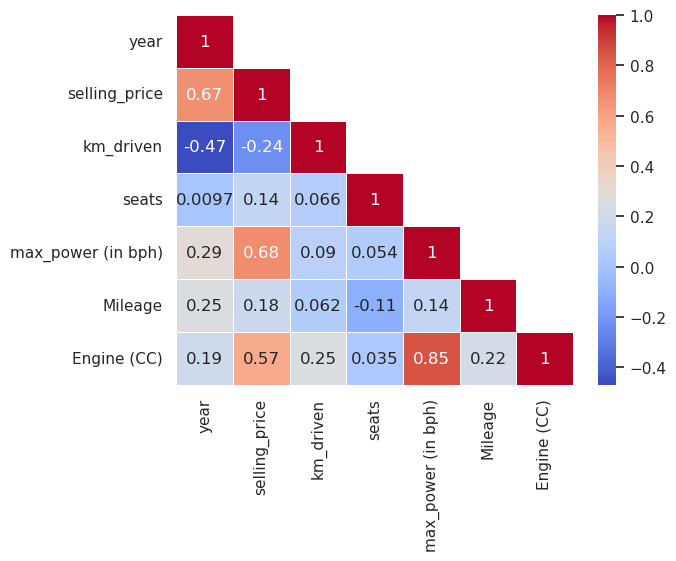

In [495]:
# Calculate the corr between numerical cols
numerical_cols = df1.select_dtypes(include=['int', 'float']).columns
corr = df1[numerical_cols].corr()
mask = ~np.tri(corr.shape[0], k=0, dtype=bool)

sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, linewidths=0.5);

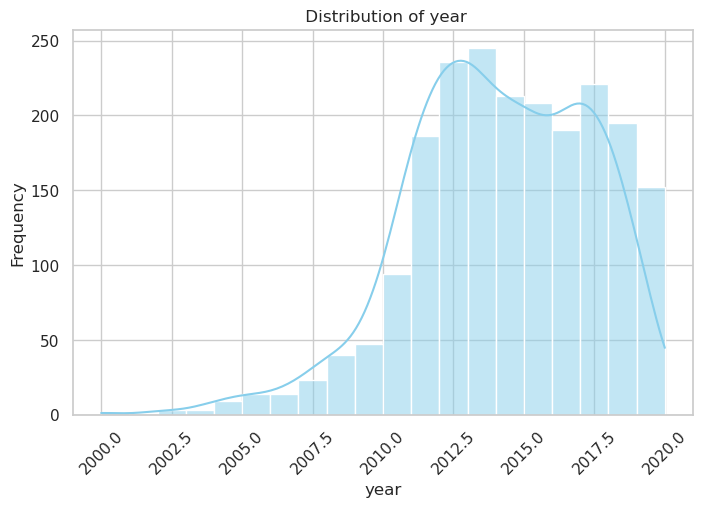

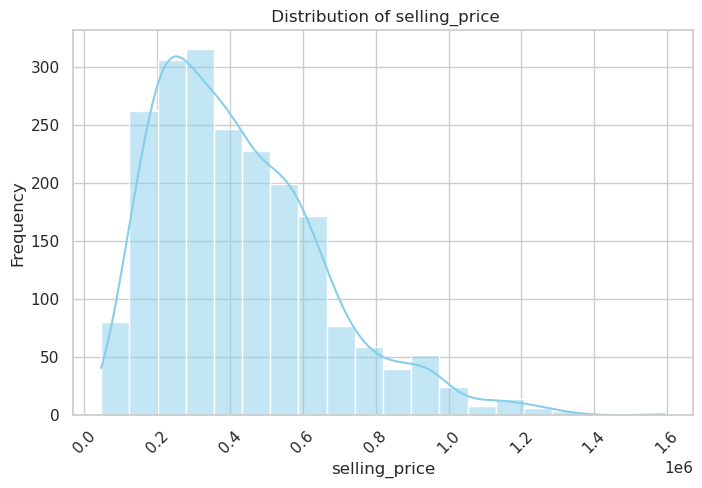

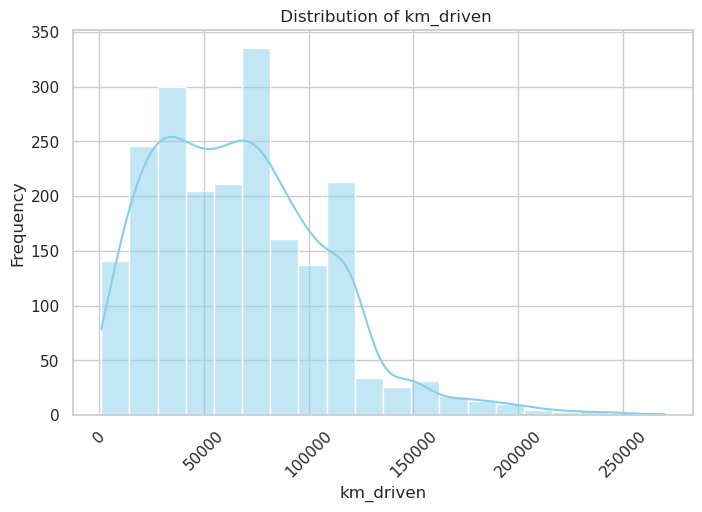

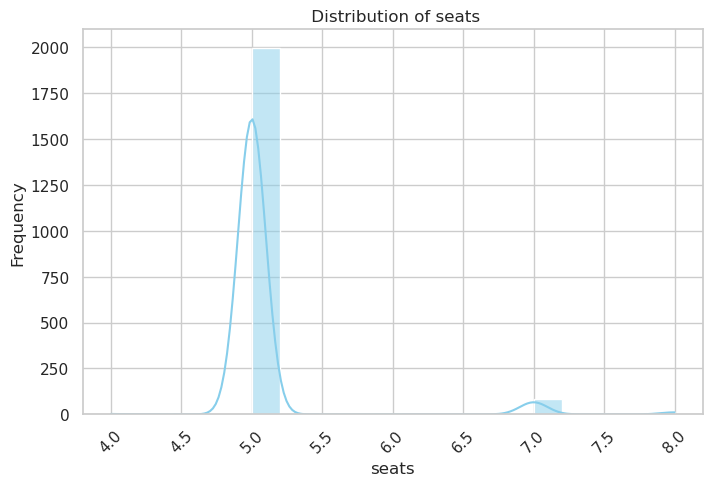

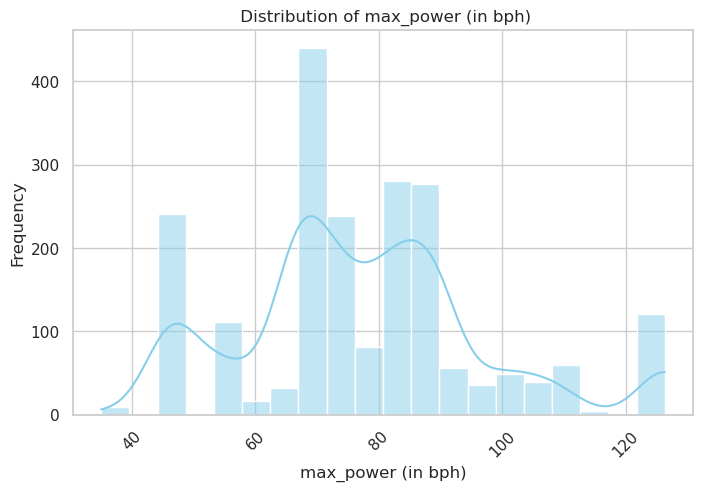

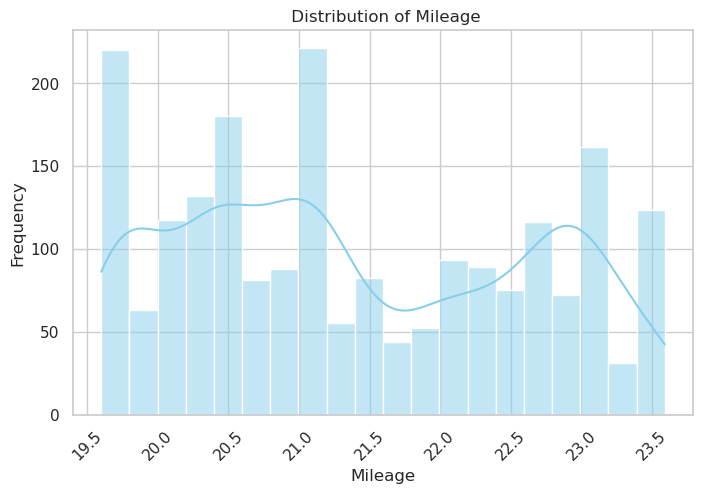

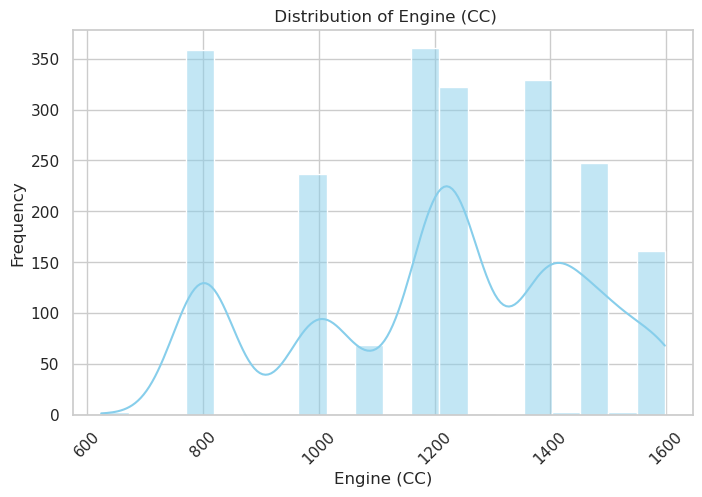

In [496]:
for col in numerical_cols:
    plt.figure(figsize=(8,5))
    sns.histplot(df[col], bins=20, color='skyblue', kde=True)
    plt.title(f' Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)

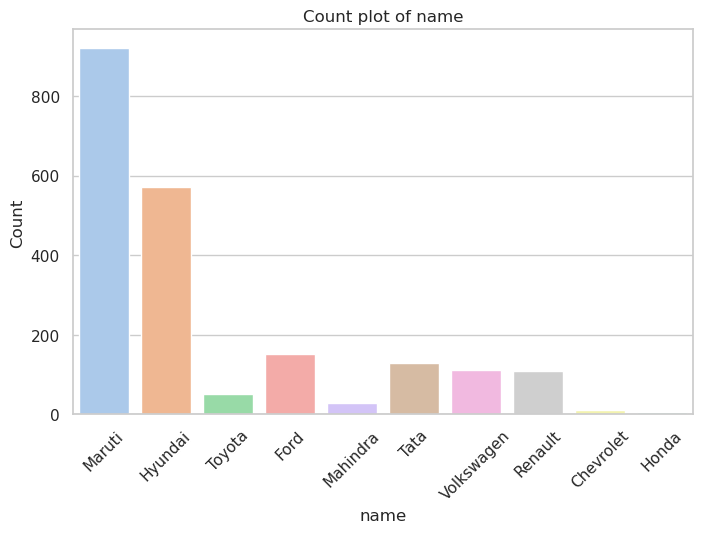

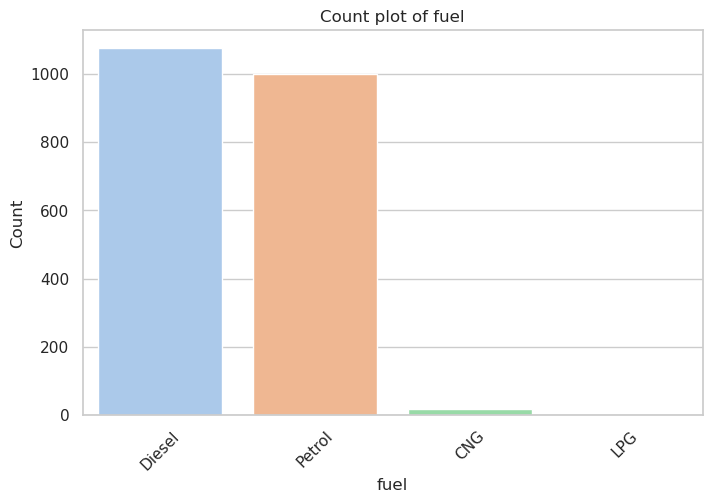

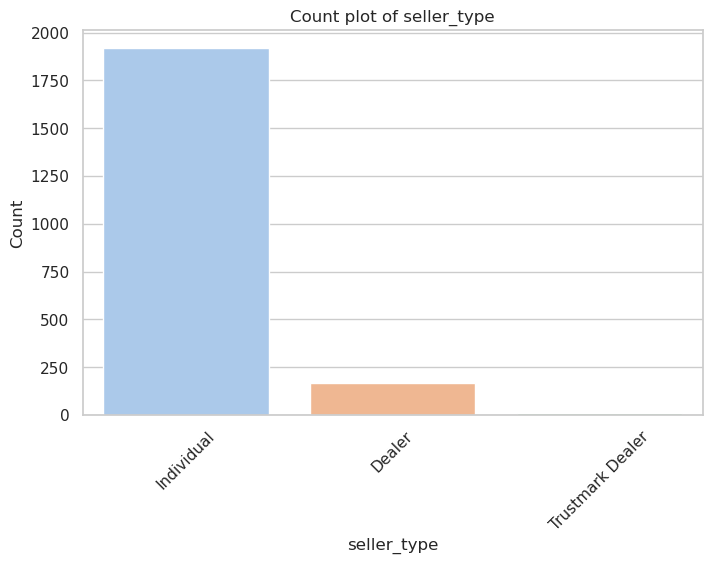

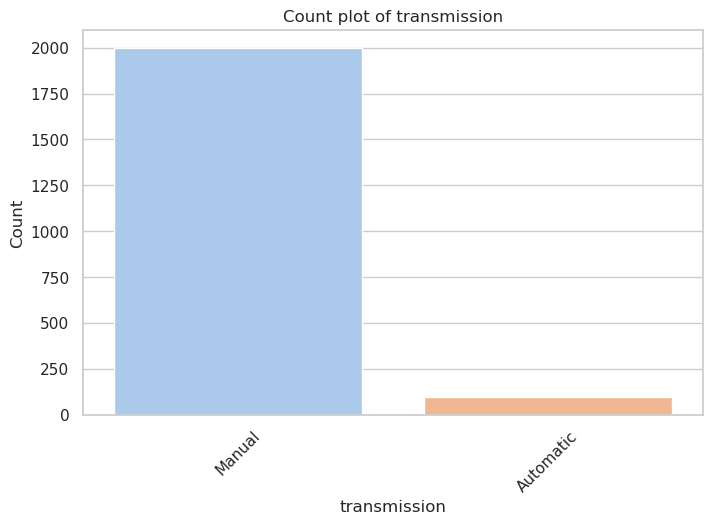

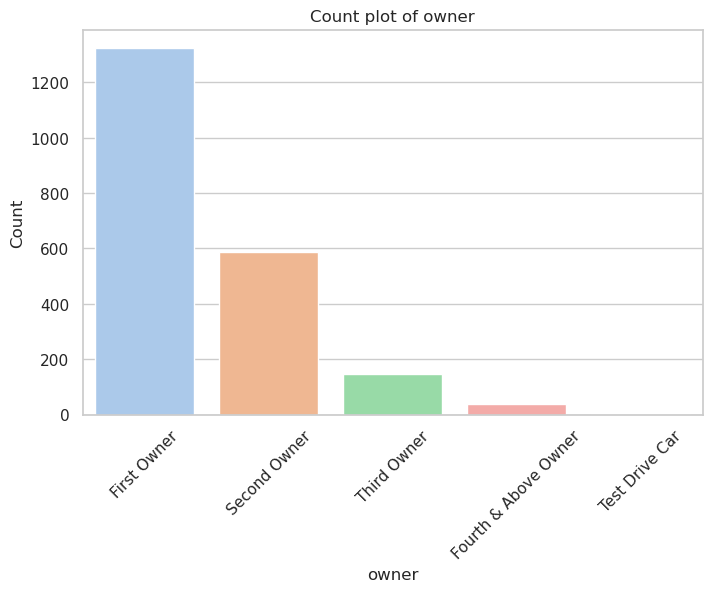

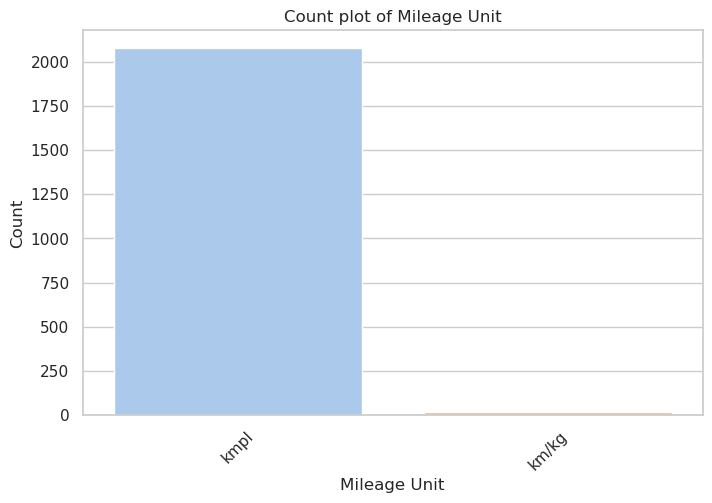

In [497]:
for col in categorical_cols:
    plt.figure(figsize=(8,5))
    sns.countplot(data=df, x=col, hue=col, palette='pastel')
    plt.title(f'Count plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

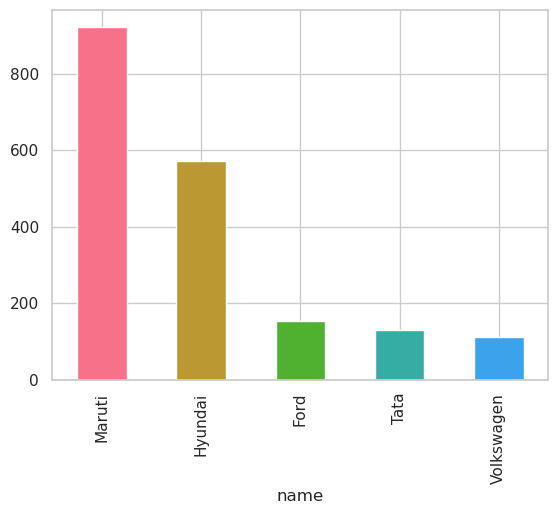

In [498]:
# Top 5 car brands
sns.set_theme(style="whitegrid", palette="husl")

names_count = df1.name.value_counts().sort_values(ascending=False).head()
names_count.plot(kind='bar', color=sns.color_palette());

In [499]:
# year with the number of car sold
pivot_table = pd.pivot_table(df, values='name', index='year', aggfunc='count')
pivot_table.sort_values(by='name', ascending=False).head()

,name
year,
2013,245
2012,236
2017,221
2014,213
2015,208


In [500]:
# Concatenate seller_type, owner and transmission into a single column
cat_df = df1.copy()
cat_df['group'] = cat_df.seller_type +  ' ' + cat_df.owner + ' ' + cat_df.transmission
pivot_table = pd.pivot_table(cat_df, values='year', index=['group'], columns='name', aggfunc='count', fill_value=0)
pivot_table['row_sum'] = pivot_table.sum(axis=1)
pivot_table = pivot_table[['row_sum'] + [col for col in pivot_table.columns if col != 'row_sum']]

pivot_table.sort_values(by='row_sum', ascending=False)

name,row_sum,Chevrolet,Ford,Honda,Hyundai,Mahindra,Maruti,Renault,Tata,Toyota,Volkswagen
group,,,,,,,,,,,
Individual First Owner Manual,1108,6,77,3,307,14,463,67,96,30,45
Individual Second Owner Manual,553,4,36,1,171,12,241,21,22,12,33
Individual Third Owner Manual,144,0,5,0,35,1,81,5,3,3,11
Dealer First Owner Manual,124,1,22,2,34,3,39,12,1,4,6
Individual First Owner Automatic,67,0,0,0,9,0,46,1,5,0,6
Individual Fourth & Above Owner Manual,36,0,3,0,8,0,19,0,0,1,5
Dealer Second Owner Manual,24,0,10,0,3,0,7,2,0,1,1
Dealer First Owner Automatic,19,0,0,0,1,0,11,2,3,0,2
Individual Second Owner Automatic,9,0,0,0,1,0,7,0,0,0,1


In [501]:
clean_df = df1.copy()

In [502]:
clean_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,2010,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,2017,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,2011,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,2013,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,Maruti,2017,425000,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
2091,Toyota,2014,425000,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364
2092,Maruti,2011,200000,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796
2093,Maruti,2017,360000,80000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,20.51,998


In [503]:
%run utils.py
clean_df.year = clean_year_owned('year', clean_df) #type: ignore

In [504]:
clean_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,max_power (in bph),Mileage Unit,Mileage,Engine (CC)
0,Maruti,10,450000,145500,Diesel,Individual,Manual,First Owner,5,74.00,kmpl,23.40,1248
1,Hyundai,14,225000,127000,Diesel,Individual,Manual,First Owner,5,90.00,kmpl,23.00,1396
2,Hyundai,7,440000,45000,Petrol,Individual,Manual,First Owner,5,81.86,kmpl,20.14,1197
3,Toyota,13,350000,90000,Diesel,Individual,Manual,First Owner,5,67.10,kmpl,23.59,1364
4,Ford,11,200000,169000,Diesel,Individual,Manual,First Owner,5,68.10,kmpl,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2090,Maruti,7,425000,12000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,23.10,998
2091,Toyota,10,425000,50000,Diesel,Individual,Manual,First Owner,5,67.06,kmpl,23.59,1364
2092,Maruti,13,200000,73000,Petrol,Individual,Manual,First Owner,5,46.30,kmpl,19.70,796
2093,Maruti,7,360000,80000,Petrol,Individual,Manual,First Owner,5,67.04,kmpl,20.51,998


In [505]:
cols_to_drop = ['max_power (in bph)', 'Mileage Unit'] # A col with a srong correlation with Engine CC ann a col with no trend
clean_df = clean_df.drop(cols_to_drop, axis=1)
clean_df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,Engine (CC)
0,Maruti,10,450000,145500,Diesel,Individual,Manual,First Owner,5,23.40,1248
1,Hyundai,14,225000,127000,Diesel,Individual,Manual,First Owner,5,23.00,1396
2,Hyundai,7,440000,45000,Petrol,Individual,Manual,First Owner,5,20.14,1197
3,Toyota,13,350000,90000,Diesel,Individual,Manual,First Owner,5,23.59,1364
4,Ford,11,200000,169000,Diesel,Individual,Manual,First Owner,5,20.00,1399


In [506]:
# Clean outliers
%run utils.py
km_outliers = find_outliers('km_driven', clean_df) # type: ignore
km_outlier_idx = km_outliers.index

upper_limit:  {172500.0}
lower_limit:  {-47500.0}
There are 44 outliers


In [507]:
# Replcae the outliers wth the upper limit
clean_df.loc[km_outlier_idx, 'km_driven'] = 172500

In [508]:
clean_df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,Mileage,Engine (CC)
0,Maruti,10,450000,145500,Diesel,Individual,Manual,First Owner,5,23.40,1248
1,Hyundai,14,225000,127000,Diesel,Individual,Manual,First Owner,5,23.00,1396
2,Hyundai,7,440000,45000,Petrol,Individual,Manual,First Owner,5,20.14,1197
3,Toyota,13,350000,90000,Diesel,Individual,Manual,First Owner,5,23.59,1364
4,Ford,11,200000,169000,Diesel,Individual,Manual,First Owner,5,20.00,1399
...,...,...,...,...,...,...,...,...,...,...,...
2090,Maruti,7,425000,12000,Petrol,Individual,Manual,First Owner,5,23.10,998
2091,Toyota,10,425000,50000,Diesel,Individual,Manual,First Owner,5,23.59,1364
2092,Maruti,13,200000,73000,Petrol,Individual,Manual,First Owner,5,19.70,796
2093,Maruti,7,360000,80000,Petrol,Individual,Manual,First Owner,5,20.51,998


In [509]:
"""STANDARDIZATION"""
scaler = StandardScaler()

scaled_data = scaler.fit_transform(clean_df[['km_driven']])

In [510]:
joblib.dump(scaler, 'km_scaler.pkl')

['km_scaler.pkl']

In [511]:
clean_df['km_driven'] = scaled_data

Text(0.5, 1.0, 'Histogram of Standardized km_driven')

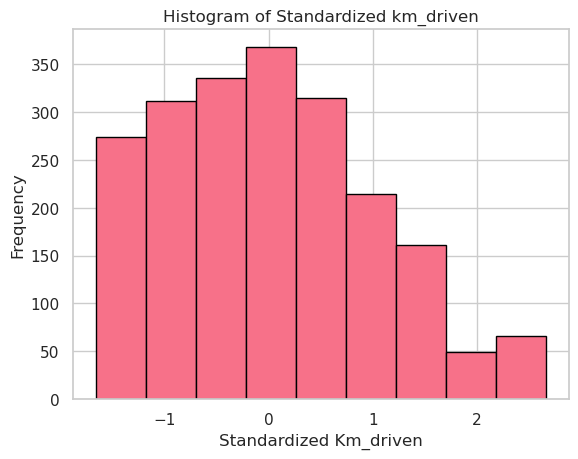

In [512]:
# plot a histogram to showcase the standardized values
plt.hist(clean_df.km_driven, bins=9, edgecolor='black')
plt.xlabel('Standardized Km_driven')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized km_driven')

In [513]:
le = LabelEncoder()

In [514]:
clean_df['transmission'] = le.fit_transform(clean_df['transmission'])

In [515]:
%run utils.py
clean_df['owner'] = clean_df.owner.apply(clean_owner_col) #type: ignore

In [516]:
clean_df.owner.value_counts()

owner
1    1325
2     586
3     146
4      37
0       1
Name: count, dtype: int64

In [517]:
# One Hot Encoding for cols
cols_to_encode = ['name', 'fuel', 'seller_type']

ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')
ohe_data = ohe.fit_transform(clean_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_columns = [
    '_'.join(col.split('_', 1)) if 'seller_type' in col else col.split('_', 1)[-1]
    for col in encoded_columns
]
encoded_df = pd.DataFrame(ohe_data, columns=encoded_columns)

clean_df = pd.concat([clean_df.drop(columns=cols_to_encode), encoded_df], axis=1)

In [518]:
df = clean_df.copy()

In [519]:
df.head(10)

,year,selling_price,km_driven,transmission,owner,seats,Mileage,Engine (CC),Ford,Honda,...,Maruti,Renault,Tata,Toyota,Volkswagen,Diesel,LPG,Petrol,seller_type_Individual,seller_type_Trustmark Dealer
0,10,450000,1.983053,1,1,5,23.40,1248,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,14,225000,1.516789,1,1,5,23.00,1396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,7,440000,-0.549890,1,1,5,20.14,1197,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,13,350000,0.584263,1,1,5,23.59,1364,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,11,200000,2.575333,1,1,5,20.00,1399,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,12,500000,-0.348263,1,2,5,23.00,1396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
6,22,150000,0.332229,1,2,5,19.70,796,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,8,680000,0.836297,1,1,5,22.54,1396,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,13,174000,0.836297,1,2,5,21.00,1461,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,12,600000,0.130602,1,1,5,21.50,1248,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [520]:
"""TRAIN TEST SPLIT"""

'TRAIN TEST SPLIT'

In [521]:
X = df.drop('selling_price', axis=1)
y = df.selling_price

In [522]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [523]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [524]:
lr.score(X_test, y_test)

0.7448103016571546

In [525]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

In [526]:
def get_best_model(X,y):
    model_params = {
        'linear_regression': {
            'model': LinearRegression(),
            'params': {
                'n_jobs': [1,3,5],
                'positive': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(max_iter=1000, tol=0.1),
            'params': {
                'alpha': [10,20,50],
                'selection': ['random', 'cyclic']
            }
        },
        'decission_tree_reg': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['poisson', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        },
        'random_forest_reg': {
            'model': RandomForestRegressor(),
            'params': {
                'max_depth': [10,20,30],
                'n_estimators': [100, 150, 200]
            }
        },
        'xgb_regressor': {
            'model': XGBRegressor(objective='reg:squarederror'),
            'params': {
                'n_estimators': [100, 150, 200]
            }
        }
    }
    scores = []
    for model_name, mp in model_params.items():
        gs = GridSearchCV(mp['model'], mp['params'], cv=cv, return_train_score=False)
        gs.fit(X, y)
        scores.append({
            'model_name': model_name,
            'best_params': gs.best_params_,
            'best_score': gs.best_score_
        })
    best_model = pd.DataFrame(scores, columns=['model_name', 'best_params', 'best_score'])
    return best_model

In [527]:
get_best_model(X_train, y_train)

,model_name,best_params,best_score
0,linear_regression,"{'n_jobs': 1, 'positive': False}",0.735016
1,lasso,"{'alpha': 10, 'selection': 'cyclic'}",0.734984
2,decission_tree_reg,"{'criterion': 'friedman_mse', 'splitter': 'ran...",0.811568
3,random_forest_reg,"{'max_depth': 10, 'n_estimators': 200}",0.881108
4,xgb_regressor,{'n_estimators': 100},0.879142


In [528]:
def train_test_cross_validate(model, X_train, y_train, X_test, y_test, cv):
    model.fit(X_train, y_train)
    model_score = model.score(X_test, y_test)
    
    # Train pred
    y_train_pred = model.predict(X_train)
    rmse_train = mean_absolute_error(y_train, y_train_pred)

    # Test Pred
    y_test_pred = model.predict(X_test)
    rmse_test = mean_absolute_error(y_test, y_test_pred)

    # Perform 5-fold cross-validation
    rmse_cv = -cross_val_score(model, X_train, y_train, scoring='neg_root_mean_squared_error', cv=cv)

    rmse_cv_mean = np.mean(rmse_cv)

    # Display results
    print(f'Model Score: {model_score:.4f}')
    print(f"Training RMSE: {rmse_train:.4f}")
    print()
    print(f"Initial Test RMSE: {rmse_test:.4f}")
    print()
    print(f"Average Cross-Validation RMSE: {rmse_cv_mean:.4f}")
    print()
    print(f"Cross-Validation Scores: {rmse_cv}\n")
    print()

In [529]:
additional_params = {
    'X_train' : X_train, 
    'y_train' : y_train, 
    'X_test' : X_test, 
    'y_test': y_test, 
    'cv':10}


models = {
    'Xgboost': XGBRegressor(n_estimators=100),
    'Random Forest': RandomForestRegressor(max_depth=10, n_estimators=200),
}

for model_name, model in models.items():
    print(f'{model_name} Regression Model: ')
    print()

    trained_model = train_test_cross_validate(model, **additional_params)

    print(trained_model)

Xgboost Regression Model: 



Model Score: 0.8962
Training RMSE: 20995.5841

Initial Test RMSE: 48023.2064

Average Cross-Validation RMSE: 78437.3915

Cross-Validation Scores: [64697.1429941  86705.42598702 73061.30652606 79546.78908644
 91366.56739967 84429.19601466 82964.63567245 77044.72631016
 71860.76185785 72697.36287427]


None
Random Forest Regression Model: 

Model Score: 0.8951
Training RMSE: 33525.6253

Initial Test RMSE: 48761.8956

Average Cross-Validation RMSE: 80922.9545

Cross-Validation Scores: [ 73127.62558577  86652.64213077  71728.88338705  74987.22355959
 106649.46152027  85849.53595528  79450.8860911   79364.35925494
  73022.36590179  78396.56209715]


None


In [530]:
model_xgb = XGBRegressor(n_estimators=100)
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [531]:
model_xgb.score(X_test, y_test)

0.8962031602859497

In [532]:
km_scaler = joblib.load('km_scaler.pkl')

km_driven_scaled = km_scaler.transform([[145500]])[0][0]
km_driven_scaled

/home/akeemlag/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


1.9830525139122053

In [537]:
def get_predict_price(name, year, km_driven, transmission, owner, seats, mileage, engine, seller_type, fuel):
    """
    Predicts the price of a car based on various features.

    Parameters:
    - name (str): The name or model of the car. e.g Hyundai
    - year (int): The manufacturing year of the car.
    - km_driven (int): The total kilometers driven by the car.
    - transmission (int): The type of transmission (e.g., 0 for manual, 1 for automatic).
    - owner (int): The number of previous owners.
    - seats (int): The number of seats in the car.
    - mileage (float): The mileage of the car in kmpl (kilometers per liter).
    - engine (int): The engine size of the car in cc.
    - seller_type (str): The type of seller (e.g., 'Dealer', 'Individual').
    - fuel (str): The type of fuel the car uses (e.g., 'Petrol', 'Diesel').

    Returns:
    - float: The predicted price of the car.
    """

    name_idx = np.where(X.columns==name)[0][0]
    fuel_idx = np.where(X.columns==fuel)[0][0]
    seller_type_idx = np.where(X.columns=='seller_type_' + seller_type)[0][0]
    km_scaler = joblib.load('km_scaler.pkl')

    x = np.zeros(len(X.columns))

    km_driven_df = pd.DataFrame([[km_driven]], columns=['km_driven'])
    km_driven_scaled = km_scaler.transform(km_driven_df)[0][0]
    x[0] = year
    x[1] = km_driven_scaled
    x[2] = transmission
    x[3] = owner
    x[4] = seats
    x[5] = mileage
    x[6] = engine
    if name_idx >= 0:
        x[name_idx] = 1.0
    if fuel_idx >= 0:
        x[fuel_idx] = 1.0
    if seller_type_idx >= 0:
        x[seller_type_idx] = 1.0

    x_df = pd.DataFrame([x], columns=X.columns)
    return model_xgb.predict(x_df)[0]

  

In [538]:
get_predict_price(name='Maruti', year=13, km_driven=145500, owner=1, seats=5, mileage=22, engine=1000, seller_type="Individual", transmission=1.0, fuel='Petrol')

136855.48

In [539]:
# Dump the model
joblib.dump(model_xgb, 'car_price_pred.pkl')

['car_price_pred.pkl']

In [540]:
columns = {
    'data_columns': [col for col in X.columns]
}
with open('columns.json', 'w') as file:
    file.write(json.dumps(columns))